In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
from bertopic import BERTopic
from wordcloud import WordCloud

C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distanc

In [2]:
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/cleanedAggregateData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.013002634048461914
{'id': 'EJ1013917', 'title': 'Enhancing the Autonomous Use of CALL: A New Curriculum Model in EFL', 'author': 'Smith, Karen, Craig, Hana', 'description': "This action research study evaluates the effectiveness of a CALL Learner Autonomy (CALL LA) course at a Japanese university. The &quot;C course&quot; blends face-to-face instruction and independent study in a CALL environment. It aims to enhance learners' autonomous use of CALL in the acquisition of English as a Foreign Language (EFL). In this study, three learning support aids were trialed: the Learner Passport, the e-Language Learning Portfolio and the e-Learner Self-Reflection Diary. The participant- researchers examined the course using data from the trial materials, observation, their own reflexive practice, learner questionnaires, interviews, artifacts and learner self-reflections. Findings indicate that teachers' and learners' consciousness was raised a

In [3]:
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.003002166748046875


In [4]:
model = BERTopic(verbose=True, embedding_model="all-mpnet-base-v2")
#embeddingmodel embedding_model="all-MiniLM-L6-v2" or embedding_mode="all-mpnet-base-v2"
docs = df.title.to_list()
pub_dates = df.publicationdateyear.to_list()
topics, probabilities = model.fit_transform(docs)
topics_over_time = model.topics_over_time(docs, pub_dates)
model.get_topic_info()

Batches: 100%|██████████| 39/39 [00:45<00:00,  1.17s/it]
2023-06-18 07:43:28,926 - BERTopic - Transformed documents to Embeddings
2023-06-18 07:43:37,957 - BERTopic - Reduced dimensionality
2023-06-18 07:43:38,009 - BERTopic - Clustered reduced embeddings
12it [00:00, 59.92it/s]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,296,-1_of_the_and_in,"[of, the, and, in, language, learning, learner...",[Applying Role-Playing Strategy to Enhance Lea...
1,0,219,0_writing_feedback_of_in,"[writing, feedback, of, in, collaborative, cor...",[Exploring the impact of using automated writi...
2,1,78,1_communication_interaction_synchronous_multim...,"[communication, interaction, synchronous, mult...",[Task-Based Oral Computer-Mediated Communicati...
3,2,74,2_mobile_learning_assisted_language,"[mobile, learning, assisted, language, english...",[Students' Perceptions and Experiences of Mobi...
4,3,68,3_technology_language_technologies_teachers,"[technology, language, technologies, teachers,...",[Modeling Preservice Chinese-as-a-Second/Forei...
5,4,61,4_call_research_the_in,"[call, research, the, in, of, and, teacher, te...",[CALL Teacher Training—Considerations for Low-...
6,5,60,5_telecollaboration_intercultural_telecollabor...,"[telecollaboration, intercultural, telecollabo...",[Developing Intercultural Competence through S...
7,6,54,6_pronunciation_speech_training_recognition,"[pronunciation, speech, training, recognition,...",[Automatic pronunciation assessment vs. automa...
8,7,53,7_vocabulary_glosses_dictionary_of,"[vocabulary, glosses, dictionary, of, dictiona...",[Hypertext Glosses for Foreign Language Readin...
9,8,46,8_online_learning_virtual_analytics,"[online, learning, virtual, analytics, in, eng...",[Understanding Online Interaction in Language ...


In [5]:
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

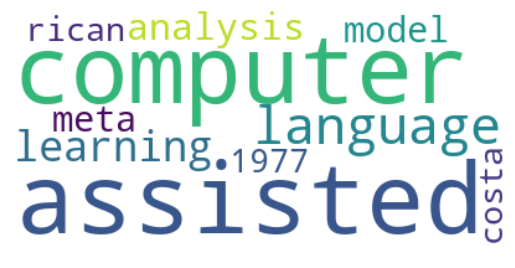

In [8]:
create_wordcloud(model, topic=16)

In [9]:
model.visualize_topics()

In [11]:
topics_to_include = list(range(0, 17))
model.visualize_barchart(topics= topics_to_include, width=300)

In [12]:
model.visualize_hierarchy()

In [13]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 67.17it/s]


In [14]:
model.visualize_heatmap()

In [18]:
model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [19]:
model.visualize_topics_over_time(topics_over_time, topics=[10, 11, 12, 13, 14, 15, 16])


In [20]:
model.visualize_topics_over_time(topics_over_time)

In [21]:
#Extract topics-document assignments
document_topics = []
for i, topic in enumerate(topics):
    document_id = df.loc[i, 'id']
    document_title = df.loc[i, 'title']
    document_topics.append({'id': document_id, 'title': document_title, 'topic': topic})
    #Export to JSON
with open('mpnet_titles_topics.json', 'w') as f:
    json.dump(document_topics, f)